In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as ipw
from IPython.display import display

water_data = pd.read_csv("https://raw.githubusercontent.com/YevheniiKshanovskyi/SFLteam/main/Lab_water/water_potability.csv")
#water_data.head()
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [11]:
# Знайти середнє значення для всього датасету
water_data = water_data.dropna()
water_data.isnull().sum()
print(np.mean(water_data))

ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64


C:\Users\kshan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


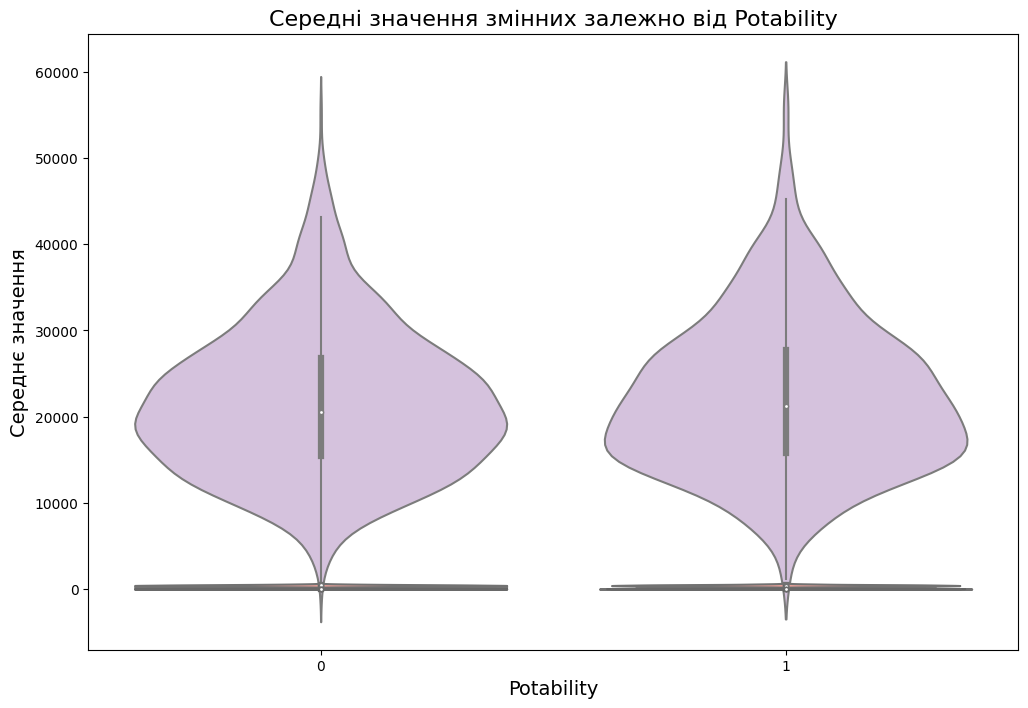

In [3]:
#Середнє значення змінних в залежності від Potability
grouped_data = water_data.groupby('Potability').mean()

# список стовпців, які треба відобразити на графіку
cols_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# побудова графіку
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x='Potability', y=cols_to_plot[0], data=water_data, ax=ax, color='#E6B0AA')
sns.violinplot(x='Potability', y=cols_to_plot[1], data=water_data, ax=ax, color='#AED6F1')
sns.violinplot(x='Potability', y=cols_to_plot[2], data=water_data, ax=ax, color='#D7BDE2')
sns.violinplot(x='Potability', y=cols_to_plot[3], data=water_data, ax=ax, color='#F7DC6F')
sns.violinplot(x='Potability', y=cols_to_plot[4], data=water_data, ax=ax, color='#A3E4D7')
sns.violinplot(x='Potability', y=cols_to_plot[5], data=water_data, ax=ax, color='#F1948A')
sns.violinplot(x='Potability', y=cols_to_plot[6], data=water_data, ax=ax, color='#A2D9CE')
sns.violinplot(x='Potability', y=cols_to_plot[7], data=water_data, ax=ax, color='#E59866')
sns.violinplot(x='Potability', y=cols_to_plot[8], data=water_data, ax=ax, color='#BB8FCE')

# настройки візуалізації
ax.set_xlabel('Potability', fontsize=14)
ax.set_ylabel('Середнє значення', fontsize=14)
ax.set_title('Середні значення змінних залежно від Potability', fontsize=16)

plt.show()

In [4]:
for column in water_data.columns:
    column_median = water_data[column].median()
    print("Медіана для стовпця '", column, "':", column_median)

Медіана для стовпця ' ph ': 7.027296860302588
Медіана для стовпця ' Hardness ': 197.19183941740528
Медіана для стовпця ' Solids ': 20933.512749666126
Медіана для стовпця ' Chloramines ': 7.143906655908775
Медіана для стовпця ' Sulfate ': 332.23217745927707
Медіана для стовпця ' Conductivity ': 423.4559056800464
Медіана для стовпця ' Organic_carbon ': 14.322018870397528
Медіана для стовпця ' Trihalomethanes ': 66.54219804427565
Медіана для стовпця ' Turbidity ': 3.968177082539273
Медіана для стовпця ' Potability ': 0.0


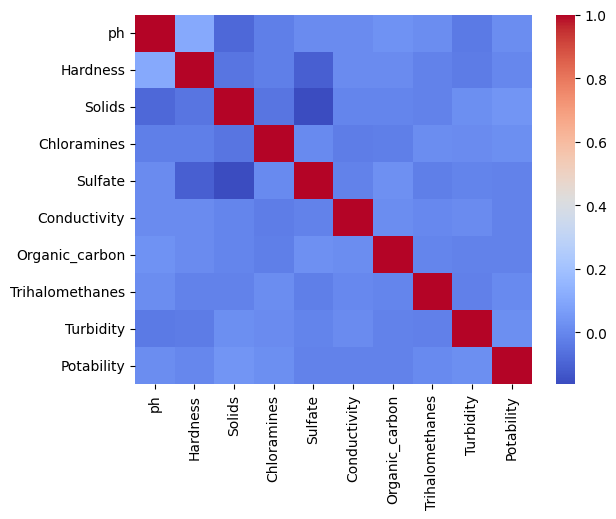

In [5]:
sns.heatmap(water_data.corr(), annot=False, cmap='coolwarm')
plt.show()

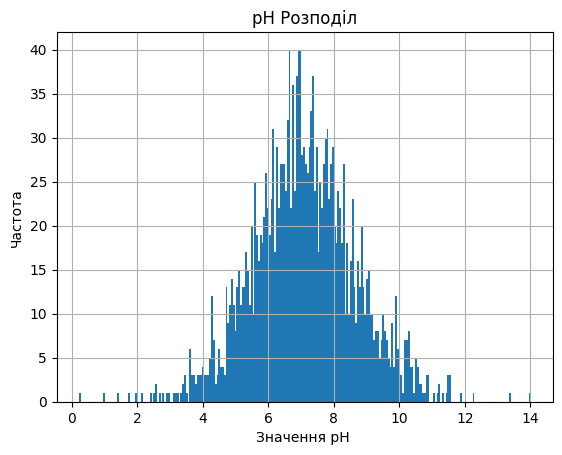

In [6]:
water_data['ph'].hist(bins = 250)
plt.title('pH Розподіл')
plt.xlabel('Значення pH ')
plt.ylabel('Частота')
plt.show()

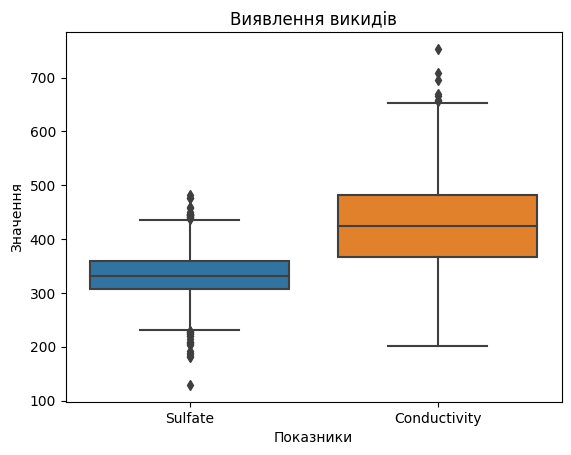

In [7]:
sns.boxplot(data=water_data[['Sulfate', 'Conductivity']])
plt.title('Виявлення викидів')
plt.xlabel('Показники')
plt.ylabel('Значення')
plt.show()

In [8]:
nan_count = water_data.isna().sum()
nan_count
percent_nans = (nan_count / water_data.shape[0]) * 100
percent_nans

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [12]:
for column in water_data.columns:
    mean_value = water_data[column].mean()
    water_data[column].fillna(mean_value, inplace=True)
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [14]:
#Середнє значення змінних в залежності від Potability
grouped_data = water_data.groupby('Potability').mean()

# побудова графіку
def making(names):
    indx = funcs[names]
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.violinplot(x='Potability', y=cols_to_plot[indx], data=water_data, ax=ax, color='#E6B0AA')
    ax.set_ylabel(names, fontsize=14)
    ax.set_title(f'Середні значення змінних залежно від {names}', fontsize=18)
    ax.set_xlabel('Potability', fontsize=14)
funcs = {
'ph' : 0,
'Hardness' : 1,
'Solids' : 2,
'Chloramines' : 3,
'Sulfate' : 4,
'Conductivity' : 5,
'Organic_carbon' : 6,
'Trihalomethanes' : 7,
'Turbidity' : 8,
}

ipw.interact(making, names = funcs.keys())

interactive(children=(Dropdown(description='names', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfa…

<function __main__.making(names)>